<a href="https://colab.research.google.com/github/ARUNIMO/Covid_19_DL_Risk_Prediction/blob/main/C_19_DL_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files

upload_file = files.upload()

Saving Covid Data.csv to Covid Data.csv


In [ ]:
covid = pd.read_csv("Covid Data.csv", low_memory = False)
print(covid.shape)
covid.head()

(1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [ ]:
#Cleaning the data to keep only the rows containing 1, 2. values as 97 and 99 are missing data

In [ ]:
covid = covid.loc[(covid.CLASIFFICATION_FINAL < 4)]
covid = covid.loc[(covid.SEX == 1) | (covid.SEX == 2)]
covid = covid.loc[(covid.USMER == 1) | (covid.USMER == 2)]
covid = covid.loc[(covid.PATIENT_TYPE == 1) | (covid.PATIENT_TYPE == 2)]
covid = covid.loc[(covid.PNEUMONIA == 1) | (covid.PNEUMONIA == 2)]
covid = covid.loc[(covid.DIABETES == 1) | (covid.DIABETES == 2)]
covid = covid.loc[(covid.COPD == 1) | (covid.COPD == 2)]
covid = covid.loc[(covid.ASTHMA == 1) | (covid.ASTHMA == 2)]
covid = covid.loc[(covid.INMSUPR == 1) | (covid.INMSUPR == 2)]
covid = covid.loc[(covid.HIPERTENSION == 1) | (covid.HIPERTENSION == 2)]
covid = covid.loc[(covid.OTHER_DISEASE == 1) | (covid.OTHER_DISEASE == 2)]
covid = covid.loc[(covid.CARDIOVASCULAR == 1) | (covid.CARDIOVASCULAR == 2)]
covid = covid.loc[(covid.OBESITY == 1) | (covid.OBESITY == 2)]
covid = covid.loc[(covid.RENAL_CHRONIC == 1) | (covid.RENAL_CHRONIC == 2)]
covid = covid.loc[(covid.TOBACCO == 1) | (covid.TOBACCO == 2)]
covid.shape

(388878, 21)

In [ ]:
#Modifying data to get it converted to One Hot Encoded data

In [ ]:
covid.SEX = covid.SEX.apply(lambda x: x if x == 1 else 0)  
covid.USMER = covid.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
covid.PATIENT_TYPE = covid.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)     
covid.PNEUMONIA = covid.PNEUMONIA.apply(lambda x: x if x == 1 else 0)           
covid.DIABETES = covid.DIABETES.apply(lambda x: x if x == 1 else 0)             
covid.COPD = covid.COPD.apply(lambda x: x if x == 1 else 0)                     
covid.ASTHMA = covid.ASTHMA.apply(lambda x: x if x == 1 else 0)                 
covid.INMSUPR = covid.INMSUPR.apply(lambda x: x if x == 1 else 0)               
covid.HIPERTENSION = covid.HIPERTENSION.apply(lambda x: x if x == 1 else 0)     
covid.OTHER_DISEASE = covid.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)  
covid.CARDIOVASCULAR = covid.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0) 
covid.OBESITY = covid.OBESITY.apply(lambda x: x if x == 1 else 0)               
covid.RENAL_CHRONIC = covid.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)   
covid.TOBACCO = covid.TOBACCO.apply(lambda x: x if x == 1 else 0)               
covid.DATE_DIED = covid.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
covid.PREGNANT = covid.PREGNANT.apply(lambda x: x if x == 1 else 0)           
covid.INTUBED = covid.INTUBED.apply(lambda x: x if x == 1 else 0)                   
covid.ICU = covid.ICU.apply(lambda x: x if x == 1 else 0)

In [ ]:
#Divide age column to 8 age groups

In [ ]:
for i in range(1,9):
    covid['age_group_%d' %i] = covid['AGE']
    covid['age_group_%d' %i]  = covid['age_group_%d' %i].apply(lambda x: 1 if (x>=(i-1)*15 and x<i*15) else 0) 

In [ ]:
#Creating the label column from summing three columns of the data. This column represents whether the patient is at risk from covid.

In [ ]:
covid['AT_RISK'] = covid['DATE_DIED'] + covid['INTUBED'] + covid['ICU']
covid.AT_RISK = covid.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 

In [ ]:
#Drop a few columns which are intuitively not longer useful

In [ ]:
covid.drop(columns = ['CLASIFFICATION_FINAL', 'INTUBED', 'ICU', 'DATE_DIED'], inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388878 entries, 0 to 1047937
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   USMER           388878 non-null  int64
 1   MEDICAL_UNIT    388878 non-null  int64
 2   SEX             388878 non-null  int64
 3   PATIENT_TYPE    388878 non-null  int64
 4   PNEUMONIA       388878 non-null  int64
 5   AGE             388878 non-null  int64
 6   PREGNANT        388878 non-null  int64
 7   DIABETES        388878 non-null  int64
 8   COPD            388878 non-null  int64
 9   ASTHMA          388878 non-null  int64
 10  INMSUPR         388878 non-null  int64
 11  HIPERTENSION    388878 non-null  int64
 12  OTHER_DISEASE   388878 non-null  int64
 13  CARDIOVASCULAR  388878 non-null  int64
 14  OBESITY         388878 non-null  int64
 15  RENAL_CHRONIC   388878 non-null  int64
 16  TOBACCO         388878 non-null  int64
 17  age_group_1     388878 non-null  int64
 18  age

In [ ]:
#Check if the data is balanced

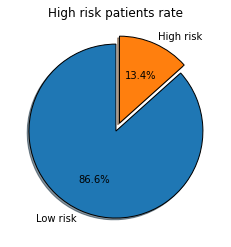

In [ ]:
slices = [covid.shape[0], covid['AT_RISK'].sum()]
labels = ['Low risk', 'High risk']
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("High risk patients rate")
plt.show()

Only 13.4% of the patients in the clean data are considered at risk while the rest of the patients are not at risk. As a result, we can not measure the quality of a model by its accuracy on the validation set. Instead, we measure the quality of a model by F-measure, also called F1-score.

To adress this issue we will use "Loss Function Intervention" technique. In the loss function, this technique multiplies the percentage of error on the minority class by constant C, which is the ratio between the number of objects in the data and the number of objects in the minority class.

In [ ]:
#Split the data to train (90%), validation (5%) and test (5%)

In [ ]:
train, validation = train_test_split(covid, test_size=0.1, shuffle=True)
validation, test = train_test_split(validation, test_size=0.5, shuffle=True)

train_y = train.AT_RISK.to_numpy()
train_y = np.reshape(train_y, (len(train_y), 1))
train_x = train.drop(columns = ['AT_RISK']).to_numpy()

validation_y = validation.AT_RISK.to_numpy()
validation_y = np.reshape(validation_y, (len(validation_y), 1))
validation_x = validation.drop(columns = ['AT_RISK']).to_numpy()

test_y = test.AT_RISK.to_numpy()
test_y = np.reshape(test_y, (len(test_y), 1))
test_x = test.drop(columns = ['AT_RISK']).to_numpy()

Logistic Regression

In [ ]:
#Set logistic regression model with "Loss Function Intervention" technique.

In [ ]:
features = train_x.shape[1]
x = tf.placeholder(tf.float32, [None,features])
y_hat = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
z = tf.add(tf.matmul(x,W),b)
p = tf.nn.sigmoid(z)

# Loss function - Equivalent to 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z)))
c = (len(train_y)/np.count_nonzero(train_y == 1))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, z, c))

In [ ]:
#Train and print loss each 100 iteration

In [ ]:
update = tf.train.AdamOptimizer(0.01).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

for i in range(0,1000): 
    sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
    if(i % 100 == 0):
        print('iteration: ', i, '\n loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

iteration:  0 
 loss: 1.5163288
iteration:  100 
 loss: 0.71209437
iteration:  200 
 loss: 0.6078027
iteration:  300 
 loss: 0.57030296
iteration:  400 
 loss: 0.55574363
iteration:  500 
 loss: 0.5496941
iteration:  600 
 loss: 0.54696804
iteration:  700 
 loss: 0.54562634
iteration:  800 
 loss: 0.544901
iteration:  900 
 loss: 0.54446244


In [ ]:
#Print results on validation set

In [ ]:
print('Logistic Regression - Validation Analysis:')
prediction = np.rint(p.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y}))

true_positive, false_positive, false_negative = (1,0,0)
# Compares the prediction of each object to its label
for i in range(0,len(validation_x)):
    if (prediction[i] == 1 and validation_y[i] == 1):
        true_positive += 1
    elif(prediction[i] == 1 and validation_y[i] == 0):
        false_positive += 1
    elif(prediction[i] == 0 and validation_y[i] == 1):
        false_negative += 1

# Calculate and print true positive and false positive precent
positive = np.count_nonzero(validation_y == 1)
negative = len(validation_y)-positive
lr_true_positive = 100*true_positive/positive
lr_false_positive = 100*false_positive/negative
print('true positive: ', "{:.1f}".format(lr_true_positive), '%')
print('false positive: ', "{:.1f}".format(lr_false_positive), '%')

# Calculate and print accuracy and F-measure
lr_accuracy = 100*np.sum(prediction == validation_y)/len(validation_y)
recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
lr_fmeasure = 2*(precision * recall) / (precision + recall)
print('Accuracy:', "{:.1f}".format(lr_accuracy), '%')
print('F-measure: ', "{:.3f}".format(lr_fmeasure))

Logistic Regression - Validation Analysis:
true positive:  92.9 %
false positive:  15.3 %
Accuracy: 85.9 %
F-measure:  0.673


Multilayer Perceptron

In [ ]:
#Set MLP model with "Loss Function Intervention" technique.

In [ ]:
features = train_x.shape[1]
x = tf.placeholder(tf.float32, [None,features])
y_hat = tf.placeholder(tf.float32, [None,1])

# Decide number of layers and neurons in each layer
layers = [50, 20, 10, 5, 1]
W = []
b = []

# create first layer
W.append(tf.Variable(tf.truncated_normal([features,layers[0]], stddev=0.1)))
b.append(tf.Variable(tf.constant(0.1, shape=[layers[0]])))
z = tf.add(tf.matmul(x,W[0]),b[0])
a = tf.nn.relu(z)

# loop to create the rest of the layers
for i in range(1,len(layers)):
    W.append(tf.Variable(tf.truncated_normal([layers[i-1], layers[i]], stddev=0.1)))
    b.append(tf.Variable(tf.constant(0.1, shape=[layers[i]])))
    z = tf.add(tf.matmul(a,W[i]),b[i])
    a = tf.nn.relu(z)
p = tf.nn.sigmoid(z)

c = len(train_y)/np.count_nonzero(train_y == 1)
ridge = 0.1*tf.nn.l2_loss(W[-1])
# Loss function Equivalent to: 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, z, c))

In [ ]:
#Train and print loss each 100 iteration

In [ ]:
update = tf.train.AdamOptimizer(0.01).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

for i in range(0,1000): 
    sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
    if(i % 100 == 0): 
        print('iteration: ', i, '\n  loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

iteration:  0 
  loss: 1.2690958
iteration:  100 
  loss: 0.68657434
iteration:  200 
  loss: 0.5905094
iteration:  300 
  loss: 0.55467385
iteration:  400 
  loss: 0.5364518
iteration:  500 
  loss: 0.52664685
iteration:  600 
  loss: 0.52127177
iteration:  700 
  loss: 0.5180695
iteration:  800 
  loss: 0.51436096
iteration:  900 
  loss: 0.5113637


In [36]:
#Print results for validation task

In [37]:
print('Multilayer Perceptron - Validation Analysis:')
prediction = np.rint(p.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y}))

# Compares the prediction of each object to its label
true_positive, false_positive, false_negative = (1,0,0)
for i in range(0,len(validation_x)):
    if (prediction[i] == 1 and validation_y[i] == 1):
        true_positive += 1
    elif(prediction[i] == 1 and validation_y[i] == 0):
        false_positive += 1
    elif(prediction[i] == 0 and validation_y[i] == 1):
        false_negative += 1

# Calculate and print true positive and false positive precent
positive = np.count_nonzero(validation_y == 1)
negative = len(validation_y)-positive
mlp_true_positive = 100*true_positive/positive
mlp_false_positive = 100*false_positive/negative
print('true positive: ', "{:.1f}".format(mlp_true_positive), '%')
print('false positive: ', "{:.1f}".format(mlp_false_positive), '%')

# Calculate and print accuracy and F-measure
mlp_accuracy = 100*np.sum(prediction == validation_y)/len(validation_y)
recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
mlp_fmeasure = 2*(precision * recall) / (precision + recall)
print('Accuracy:', "{:.1f}".format(mlp_accuracy), '%')
print('F-measure: ', "{:.3f}".format(mlp_fmeasure))

Multilayer Perceptron - Validation Analysis:
true positive:  95.6 %
false positive:  16.8 %
Accuracy: 85.1 %
F-measure:  0.667


**Convolutional Neural Network**-CNN

In [38]:
features = train_x.shape[1]
x = tf.placeholder(tf.float32, shape=[None, features])
y_hat = tf.placeholder(tf.float32, shape=[None, 1])

# convolution layer with max pooling
W_conv = tf.Variable(tf.truncated_normal([2, 2, 1, 4], stddev=0.1))
b_conv = tf.Variable(tf.constant(0.1, shape=[4]))
x_ = tf.reshape(x, [-1,5,5,1]) 
h_conv = tf.nn.relu(tf.nn.conv2d(x_, W_conv, strides=[1, 1, 1, 1], padding='SAME') + b_conv)
h_pool = tf.nn.max_pool(h_conv, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

# 2 fully connected layers
h_flat = tf.reshape(h_pool, [-1, 5*5*4])
W_fc1 = tf.Variable(tf.truncated_normal([5*5*4, 10], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[10]))
h_fc1 = tf.nn.relu(tf.matmul(h_flat, W_fc1) + b_fc1)

W_fc2 = tf.Variable(tf.truncated_normal([10, 1], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[1]))
h_fc2 = tf.add(tf.matmul(h_fc1,W_fc2),b_fc2)
y_conv = tf.nn.sigmoid(h_fc2)

c = (len(train_y)/np.count_nonzero(train_y == 1))
ridge = + 0.1*tf.nn.l2_loss(W_fc2)
# Loss function - Equivalent to 1/m(y_hat*-log(sigmoid(z))*c + (1-y_hat)*-log(1-sigmoid(z))
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(y_hat, h_fc2, c))+ridge

In [39]:
#Train and print loss each 100 iteration

In [40]:
update = tf.train.AdamOptimizer(1e-2).minimize(loss)
sess = tf.Session() 
sess.run(tf.global_variables_initializer()) 

for i in range(0,500): 
    sess.run(update, feed_dict = {x:train_x, y_hat:train_y})
    if(i % 100 == 0):
        print('iteration: ', i, '\n  loss:', loss.eval(session=sess, feed_dict={x:train_x, y_hat:train_y}))

iteration:  0 
  loss: 1.2700896
iteration:  100 
  loss: 0.573846
iteration:  200 
  loss: 0.5513669
iteration:  300 
  loss: 0.54379463
iteration:  400 
  loss: 0.5400966


In [41]:
#Auxilary function to count specific elements in tensors

In [42]:
def tf_count(t, val):
    elements_equal_to_value = tf.equal(t, val)
    as_ints = tf.cast(elements_equal_to_value, tf.int32)
    count = tf.reduce_sum(as_ints)
    return count

In [43]:
#calculate confusion matrix values, accuracy and F-measure

In [44]:
prediction = tf.round(y_conv)
all = tf_count(y_hat,1)+tf_count(y_hat,0)
positive = tf_count(y_hat,1)
negative = all-positive

# calculate confusion matrix values
true_positive = tf_count(tf.add(prediction,y_hat),2)
false_positive = tf_count(tf.subtract(prediction,y_hat),1)
false_negative = tf_count(tf.subtract(y_hat,prediction),1)
counter = tf_count(tf.subtract(y_hat,prediction),0)
tp = 100*true_positive / positive
fp = 100*false_positive / negative

# calculate accuracy and F-measure
accuracy = 100*counter / all
recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
eval = 2*(precision * recall) / (precision + recall)

In [45]:
#Print results for validation set

In [46]:
print('CNN - Validation Analysis:')

cnn_true_positive = tp.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y})
cnn_false_positive = fp.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y})
cnn_accuracy = accuracy.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y})
cnn_fmeasure = eval.eval(session=sess,feed_dict={x:validation_x, y_hat:validation_y})
print('true positive:', "{:.1f}".format(cnn_true_positive), '%')
print('false positive:', "{:.1f}".format(cnn_false_positive), '%')
print('Accuracy:', "{:.1f}".format(cnn_accuracy), '%')
print('F-measure: ', "{:.3f}".format(cnn_fmeasure))

CNN - Validation Analysis:
true positive: 94.7 %
false positive: 16.8 %
Accuracy: 85.0 %
F-measure:  0.663


**Model Comparison**-->Logistic Regression || MLP || CNN

In [47]:
#Plot comparison between the 3 models.

In [51]:
models = ['Logistic Regression', 'MLP', 'CNN']
true_positive = [lr_true_positive, mlp_true_positive, cnn_true_positive]
false_positive = [lr_false_positive, mlp_false_positive, cnn_false_positive]
overall_accuracy = [lr_accuracy, mlp_accuracy, cnn_accuracy]
f_measure = [lr_fmeasure, mlp_fmeasure, cnn_fmeasure]

AttributeError: ignored

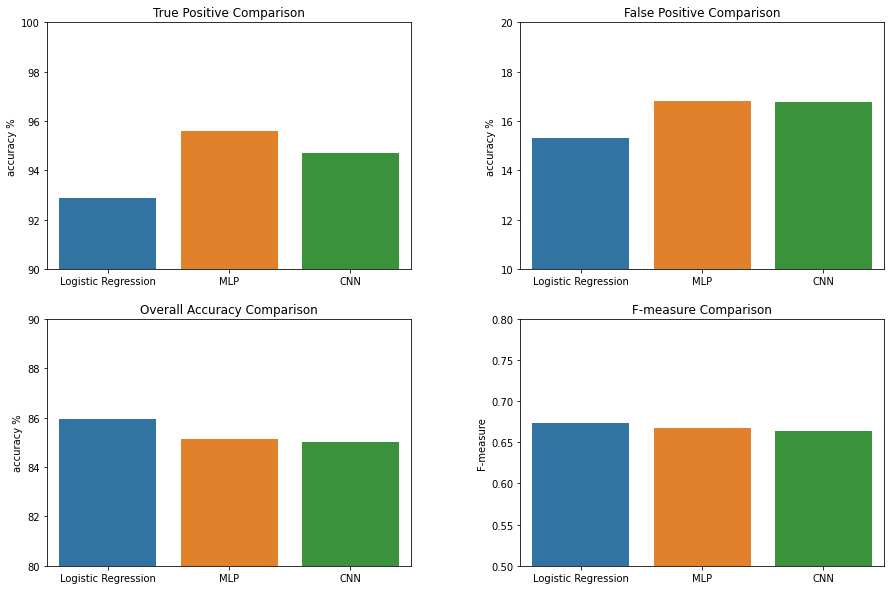

In [52]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
plt.subplots_adjust(wspace = 0.3)
sns.barplot(x=models, y=true_positive, ax = ax[0,0])
sns.barplot(x=models, y=false_positive, ax = ax[0,1])
sns.barplot(x=models, y=overall_accuracy, ax = ax[1,0])
sns.barplot(x=models, y=f_measure, ax = ax[1,1])

ax[0,0].set(title='True Positive Comparison', ylabel='accuracy %', ylim=(90, 100))
ax[0,1].set(title='False Positive Comparison', ylabel='accuracy %', ylim=(10, 20))
ax[1,0].set(title='Overall Accuracy Comparison', ylabel='accuracy %', ylim=(80, 90))
ax[1,1].set(title='F-measure Comparison', ylabel='F-measure', ylim=(0.5, 0.8))

# add numbers on top of the bars
for x in fig.get_axes():
    x.bar_label(x.containers[0], label_type='edge')

plt.show()


In [53]:
print('Multilayer Perceptron - Test Analysis:')
prediction = np.rint(p.eval(session=sess,feed_dict={x:test_x, y_hat:test_y}))

# Compares the prediction of each object to its label
true_positive, false_positive, false_negative = (1,0,0)
for i in range(0,len(test_x)):
    if (prediction[i] == 1 and test_y[i] == 1):
        true_positive += 1
    elif(prediction[i] == 1 and test_y[i] == 0):
        false_positive += 1
    elif(prediction[i] == 0 and test_y[i] == 1):
        false_negative += 1

# Calculate and print true positive and false positive precent
positive = np.count_nonzero(test_y == 1)
negative = len(test_y)-positive
mlp_true_positive = 100*true_positive/positive
mlp_false_positive = 100*false_positive/negative
print('true positive: ', "{:.1f}".format(mlp_true_positive), '%')
print('false positive: ', "{:.1f}".format(mlp_false_positive), '%')

# Calculate and print accuracy and F-measure
mlp_accuracy = 100*np.sum(prediction == test_y)/len(test_y)
recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
mlp_fmeasure = 2*(precision * recall) / (precision + recall)
print('Accuracy:', "{:.1f}".format(mlp_accuracy), '%')
print('F-measure: ', "{:.3f}".format(mlp_fmeasure))

Multilayer Perceptron - Test Analysis:


TypeError: ignored